# Modelo de deteccion de phishing en contenido web (HTML)

### Modelos a utilizar: SVM, Random Forest y Naive Bayes

Referencias:  
Tiwari, S., (2021) Phishing Dataset for Machine Learning. https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning


#### Analisis Exploratorio

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("datasets/Content/Phishing_Legitimate_full.csv")
df.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


In [30]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [31]:
print("Good websites: ", df['CLASS_LABEL'].value_counts()[0])
print(df[df.CLASS_LABEL == 0].head(10))

Good websites:  5000
        id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
5000  5001        2               1          0         25        0   
5001  5002        2               1          0         24        0   
5002  5003        2               1          0         21        0   
5003  5004        2               1          0         22        0   
5004  5005        2               1          0         25        0   
5005  5006        2               1          0         22        0   
5006  5007        1               0          0         20        0   
5007  5008        2               1          0         22        0   
5008  5009        3               1          0         24        0   
5009  5010        2               1          0         25        0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
5000                  0         0            0              0  ...   
5001                  0         0            0              0  ...  

In [32]:
print("Phishing websites: ", df['CLASS_LABEL'].value_counts()[1])
print(df[df.CLASS_LABEL == 1].head(10))

Phishing websites:  5000
   id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   
5   6        3               1          1         42        1   
6   7        2               0          5         60        0   
7   8        1               0          3         30        0   
8   9        8               7          2         76        1   
9  10        2               0          2         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0

In [33]:
df.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


<AxesSubplot: xlabel='CLASS_LABEL', ylabel='count'>

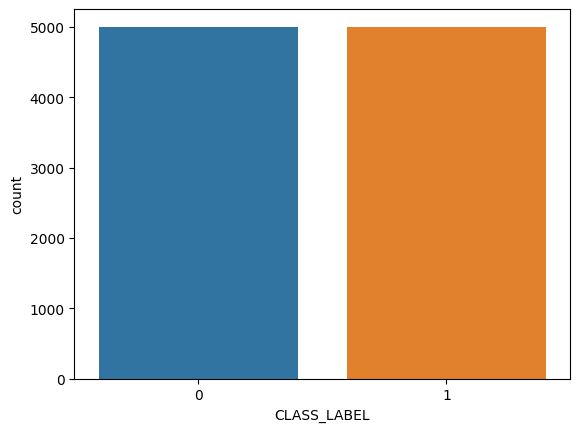

In [34]:
sns.countplot(x='CLASS_LABEL', data=df)

In [35]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# Change name CLASS_LABEL to label
df = df.rename(columns={'CLASS_LABEL': 'label'})

In [37]:
def correlation_heatmap(data, idx_s, idx_e):
    y = data['label']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['label'] = y
    sns.heatmap(temp.corr(), annot=True, fmt=".2f")
    plt.show()

In [39]:
# Remove unnecessary columns
df = df.iloc[:, 27:]

In [41]:
df = df.drop(['UrlLengthRT'], axis=1)

In [43]:
df = df.drop(['SubdomainLevelRT'], axis=1)

In [44]:
df.columns

Index(['PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT', 'label'],
      dtype='object')

In [46]:
df.to_csv("datasets/Content/Phishing_Legitimate_clean.csv", index=False)

# Entrenamiento de modelos
### Modelos a utilizar: SVM, Random Forest y Naive Bayes

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [55]:
data = pd.read_csv("datasets/Content/Phishing_Legitimate_clean.csv")
scaler = MinMaxScaler()

In [56]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### SVM

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1200
           1       0.94      0.93      0.94      1300

    accuracy                           0.94      2500
   macro avg       0.93      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



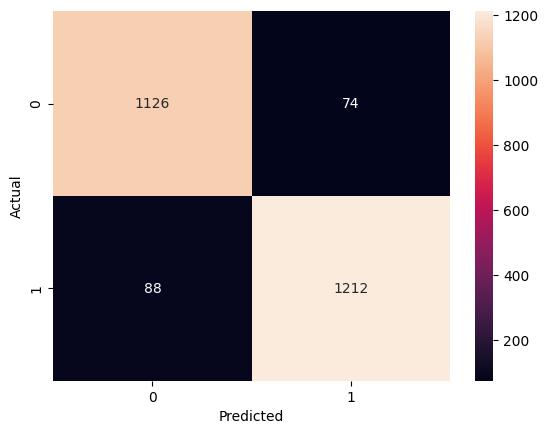

In [59]:
model_SVM = SVC()
model_SVM.fit(X_train, y_train)

predictions = model_SVM.predict(X_test)

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, predictions))

#### Random Forest

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1200
           1       0.99      0.98      0.98      1300

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



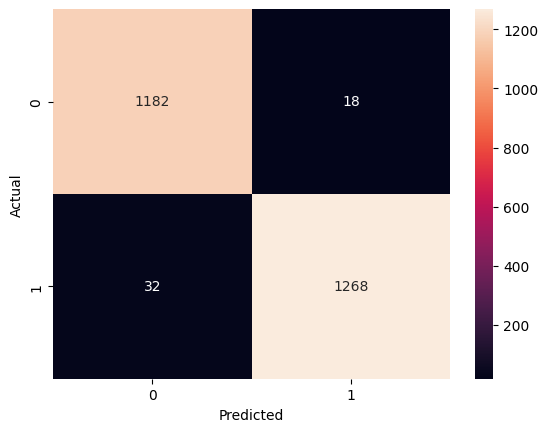

In [57]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, y_train)

predictions_RF = model_RF.predict(X_test)
cm = confusion_matrix(y_test, predictions_RF)

sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, predictions_RF))

#### Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       0.72      0.95      0.82      1200
           1       0.93      0.66      0.77      1300

    accuracy                           0.80      2500
   macro avg       0.82      0.80      0.80      2500
weighted avg       0.83      0.80      0.79      2500



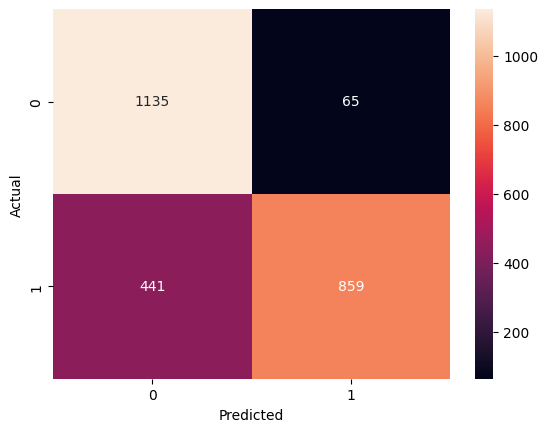

In [58]:
model_NB = MultinomialNB()

model_NB.fit(X_train, y_train)

predictions_NB = model_NB.predict(X_test)

cm = confusion_matrix(y_test, predictions_NB)

sns.heatmap(cm, annot=True, fmt="g")

plt.xlabel('Predicted')
plt.ylabel('Actual')

print(classification_report(y_test, predictions_NB))